## **Part 4 Project- Flower images**

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

'2.4.1'

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
  
print('Found GPU at: {}'.format(device_name))

SystemError: ignored

In [ ]:
import collections
import io
import math
import os
import random
from six.moves import urllib
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from keras.applications import VGG16, ResNet50
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers import Input
from keras.models import Sequential, Model
from keras.optimizers import SGD, RMSprop
from keras.preprocessing.image import img_to_array, ImageDataGenerator
import imutils
from imutils import paths
import os
import tarfile
import shutil

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

import pandas as pd
import random
random.seed(0)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import tarfile
import urllib
def data_download(filename, source_url, work_dir):
    if not os.path.exists(work_dir):
        os.mkdir(work_dir)
    filepath=os.path.join(work_dir,filename)
    if not os.path.exists(filepath):
        print("Downloading file, Please wait...")
        filepath, _ = urllib.request.urlretrieve(source_url + filename,filepath)
        statinfo = os.stat(filepath)
        print(('Succesfully downloaded', filename, statinfo.st_size, 'bytes.'))
        untar(filepath,work_dir)
    return filepath

In [ ]:
#only extract jpg files
def jpg_files(members):
    for tarinfo in members:
        if os.path.splitext(tarinfo.name)[1] == ".jpg":
            yield tarinfo

In [ ]:
# extract function
def untar(fname,path="17category-flowers-py"): #untarring the archive
    tar = tarfile.open(fname)
    tar.extractall(path="17category-flowers-py", members=jpg_files(tar))
    tar.close()
    if path is "":
        print("File Extracted in Current Directory")
    else:
        print("File Extracted in to ",  path)

In [ ]:
data_download("17flowers.tgz", "http://www.robots.ox.ac.uk/~vgg/data/flowers/17/","17category-flowers-py")

('Succesfully downloaded', '17flowers.tgz', 60270631, 'bytes.')
File Extracted in to  17category-flowers-py


'17category-flowers-py/17flowers.tgz'

In [ ]:
os.listdir("/content/17category-flowers-py/")

['jpg', '17flowers.tgz']

In [ ]:
#load images as np arrays
def load_data(fpath):    
    img=Image.open(fpath).resize((224,224)) # resize to 224x224 for training purposes
    img = np.asarray(img, dtype='float32')
    return img

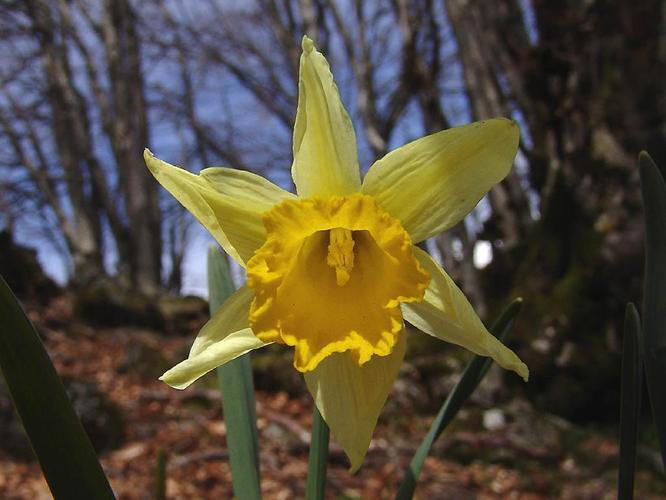

In [ ]:
from PIL import Image,ImageFilter#show one example of image
Image.open("/content/17category-flowers-py/jpg/image_0002.jpg")

In [ ]:
#all images are loaded as np arrays
images=[]
labels=[]
total=1361
j=0
for i in range(1, total): 
    fname="/content/17category-flowers-py/jpg/image_"    
    fpath = os.path.join(fname + str(i).zfill(4) + ".jpg")
    images.append(load_data(fpath))
    labels.append(j) #labels are created as well
    if i%80==0: j+=1

In [ ]:
images = np.asarray(images) # all of the images are converted to np array of (1360,224,224,3)
labels = np.asarray(labels).reshape(1360,1) # labels are also converted to (1360,1)
print(labels.shape)
print(images.shape)

(1360, 1)
(1360, 224, 224, 3)


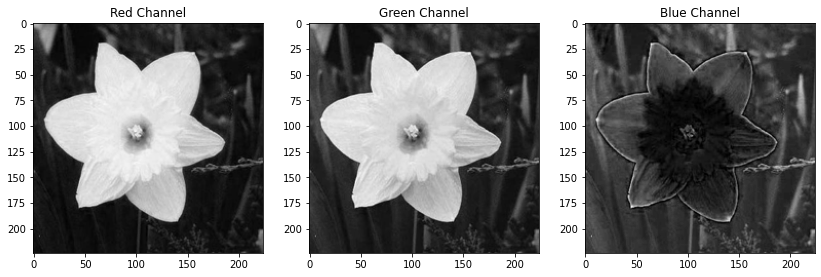

In [ ]:
plt.figure(figsize=(14,10))
plt.subplot(1,3,1)
plt.title("Red Channel")
plt.imshow(images[5][:,:,0],cmap='gray')

plt.subplot(1,3,2)
plt.title("Green Channel")
plt.imshow(images[5][:,:,1],cmap='gray')

plt.subplot(1,3,3)
plt.title("Blue Channel")
plt.imshow(images[5][:,:,2],cmap='gray')

Green channel is better than other channel since the image have lot of green colour

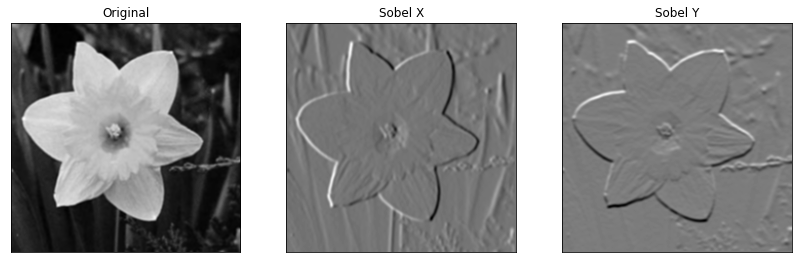

In [ ]:

# converting to gray scale
gray = cv2.cvtColor(images[5], cv2.COLOR_BGR2GRAY)

# remove noise
img = cv2.GaussianBlur(gray,(3,3),0)

sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y

plt.figure(figsize=(14,10))
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

**Supervised Algorithm (KNN)- Flower Dataset**

In [ ]:
#Loading image with one channel
from tqdm import tqdm
import cv2
x_ch1 = []
y_ch1 = []

j=0 # initialisation
for i in range(1, total): # f for format ,jpg
    fname="/content/17category-flowers-py/jpg/image_"    
    fpath = os.path.join(fname + str(i).zfill(4) + ".jpg")
    train_img = cv2.imread(fpath,0)
    train_img_resize = cv2.resize(train_img, (128, 128)) 
    x_ch1.append(train_img_resize)
    y_ch1.append(j)
    if i%80==0: j+=1


In [ ]:
x_ch1 = np.asarray(x_ch1) # all of the images are converted to np array of (1360,224,224,3)
y_ch1 = np.asarray(y_ch1).reshape(1360,1) # labels are also converted to (1360,1)
print(x_ch1.shape)
print(y_ch1.shape)

(1360, 128, 128)
(1360, 1)


In [43]:
x_sup=x_ch1.reshape(1360,-1)
x_sup.shape

(1360, 16384)

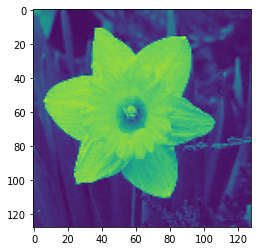

In [ ]:
plt.imshow(x_ch1[5])

In [45]:
#Split the dataset for supervised learning model
X_train_s, X_test_s, y_train_s, y_test_s=train_test_split(x_sup,labels,test_size=0.2,random_state=0)

In [47]:
from sklearn.preprocessing import StandardScaler
std_sc=StandardScaler()
X_train_s=std_sc.fit_transform(X_train_s)
X_test_s=std_sc.fit_transform(X_test_s)

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
scores=[]

for k in range(1,10):
    KNN=KNeighborsClassifier(n_neighbors=k,weights="distance")
    KNN.fit(X_train_s,y_train_s)
    knn_test=KNN.predict(X_test_s)
    scores.append(KNN.score(X_test_s,y_test_s))

Text(0.5, 1.0, 'Accuracy plot for different K value')

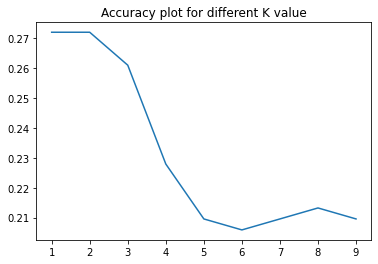

In [52]:
plt.plot(range(1,10),scores)
plt.title("Accuracy plot for different K value")

In [53]:
#K Neighbor Classifier
KNN=KNeighborsClassifier(n_neighbors=6,weights="distance")
KNN.fit(X_train_s,y_train_s)
knn_test=KNN.predict(X_test_s)
knn_acc=KNN.score(X_test_s,y_test_s)
print("Accuracy for test data:{}".format(KNN.score(X_test_s,y_test_s)))
print("Accuracy for train data:{}".format(KNN.score(X_train_s,y_train_s)))

Accuracy for test data:0.20588235294117646
Accuracy for train data:1.0


In [54]:
print(metrics.classification_report(y_test_s, knn_test))

              precision    recall  f1-score   support

           0       0.40      0.17      0.24        23
           1       0.50      0.09      0.15        11
           2       0.14      0.08      0.10        13
           3       0.11      0.22      0.15        18
           4       0.00      0.00      0.00        10
           5       0.34      0.62      0.44        21
           6       0.33      0.09      0.14        23
           7       0.04      0.12      0.06         8
           8       0.10      0.20      0.13        15
           9       0.67      0.27      0.38        15
          10       0.50      0.12      0.20        16
          11       0.67      0.29      0.40        14
          12       0.22      0.32      0.26        22
          13       0.00      0.00      0.00        11
          14       0.14      0.47      0.22        17
          15       0.25      0.07      0.11        15
          16       1.00      0.05      0.10        20

    accuracy              

In [ ]:
#Split the dataset-NN Models
X_train, X_test, y_train, y_test=train_test_split(images,labels,test_size=0.2,random_state=0)

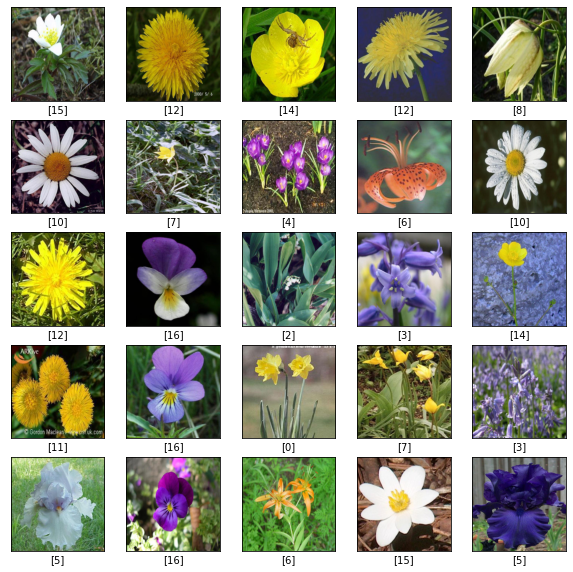

In [ ]:
plt.figure(figsize=(10,10)) # plot 25 images
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i]/255,cmap='gray')
    plt.xlabel(y_train[i])

In [ ]:
# dividing images into train and test folders by creating images from arrays

def create_images(data, labels, folder):
    dirname=folder
    
    if not os.path.exists(dirname): #check if the folder exists; if not make dir
        os.mkdir(dirname)
    n=0
    
    for i in data:
        label_n=labels[n]
        subfolder = folder + "/" + str(label_n) 
        if not os.path.exists(subfolder): # create subfolders with categories
            os.mkdir(subfolder)  
        filepath =  subfolder + "/" + str(n)+ ".jpg"
        cv2.imwrite(filepath, data[n]) #save image to corresponding subfolders
        n+=1

In [ ]:
create_images(X_train, y_train, 'train') #save image to corresponding subfolders
create_images(X_test, y_test, 'test')

In [ ]:
train_dir =os.path.realpath('train')
validation_dir = os.path.realpath('test')
image_size = 224

In [ ]:
nn_model=Sequential()
nn_model.add(Flatten(input_shape=(224,224,3)))
nn_model.add(Dense(units = 840, activation = 'relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(units = 210, activation = 'relu'))
nn_model.add(Dense(units = 210, activation = 'relu'))
nn_model.add(Dropout(0.6))
nn_model.add(Dense(units = 105, activation = 'relu'))
nn_model.add(Dense(units = 17, activation = 'softmax'))
nn_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 150528)            0         
_________________________________________________________________
dense (Dense)                (None, 840)               126444360 
_________________________________________________________________
dropout (Dropout)            (None, 840)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 210)               176610    
_________________________________________________________________
dense_2 (Dense)              (None, 210)               44310     
_________________________________________________________________
dropout_1 (Dropout)          (None, 210)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 105)               2

In [ ]:
# CNN from Scratch

cnn_model=Sequential()

cnn_model.add(Conv2D(112,(3,3),input_shape=(224,224,3),activation='relu',padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(112,(3,3),activation='relu',padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(112,(3,3),activation='relu',padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Flatten())
#cnn_model.add(Dense(units = 3375, activation = 'relu'))
#cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(units = 840, activation = 'relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(units = 210, activation = 'relu'))
cnn_model.add(Dense(units = 17, activation = 'softmax'))
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 112)     3136      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 112)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 112)     113008    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 112)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 112)       113008    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 112)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 87808)            

In [ ]:
adam = Adam(lr=0.0001)
nn_model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
adam = Adam(lr=0.0001)
cnn_model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze all the layers except for the last layer: 
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False

from keras import models
from keras import layers
from keras import optimizers
 
# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(17, activation='softmax'))
model.summary() 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 17)                17425     
Total params: 40,423,249
Trainable params: 32,787,985
Non-trainable params: 7,635,264
_________________________________________________________________


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( # this function will generate augmented images in real time
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255) # for validation we don't need to augment

train_batchsize = 100
val_batchsize = 10
 
train_generator = train_datagen.flow_from_directory( # this function takes images from folders and feeds to Imagedatagenerator
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 1088 images belonging to 17 classes.
Found 272 images belonging to 17 classes.


In [ ]:
with tf.device('/device:GPU:0'): # NN model from scratch fit
  history = nn_model.fit_generator(
  train_generator,
  steps_per_epoch=train_generator.samples/train_generator.batch_size ,
  epochs=100,
  validation_data=validation_generator,
  validation_steps=validation_generator.samples/validation_generator.batch_size)

Epoch 1/100
10/10 [==============================] - 13s 1s/step - loss: 4.7108 - accuracy: 0.0638 - val_loss: 2.8298 - val_accuracy: 0.0956
Epoch 2/100
10/10 [==============================] - 12s 1s/step - loss: 4.0271 - accuracy: 0.0499 - val_loss: 2.7424 - val_accuracy: 0.0846
Epoch 3/100
10/10 [==============================] - 12s 1s/step - loss: 3.1277 - accuracy: 0.0832 - val_loss: 2.7436 - val_accuracy: 0.1103
Epoch 4/100
10/10 [==============================] - 12s 1s/step - loss: 3.0453 - accuracy: 0.0694 - val_loss: 2.7233 - val_accuracy: 0.1397
Epoch 5/100
10/10 [==============================] - 12s 1s/step - loss: 2.8831 - accuracy: 0.0970 - val_loss: 2.6793 - val_accuracy: 0.1250
Epoch 6/100
10/10 [==============================] - 12s 1s/step - loss: 2.8579 - accuracy: 0.0773 - val_loss: 2.6757 - val_accuracy: 0.1434
Epoch 7/100
10/10 [==============================] - 12s 1s/step - loss: 2.7871 - accuracy: 0.0954 - val_loss: 2.6336 - val_accuracy: 0.2022
Epoch 8/100
1

In [ ]:
with tf.device('/device:GPU:0'): # CNN model from scratch fit
  history = cnn_model.fit_generator(
  train_generator,
  steps_per_epoch=train_generator.samples/train_generator.batch_size ,
  epochs=100,
  validation_data=validation_generator,
  validation_steps=validation_generator.samples/validation_generator.batch_size)

Epoch 1/100
10/10 [==============================] - 13s 1s/step - loss: 0.7293 - accuracy: 0.7592 - val_loss: 1.0171 - val_accuracy: 0.6618
Epoch 2/100
10/10 [==============================] - 13s 1s/step - loss: 0.6974 - accuracy: 0.7555 - val_loss: 1.0161 - val_accuracy: 0.6838
Epoch 3/100
10/10 [==============================] - 13s 1s/step - loss: 0.6480 - accuracy: 0.7730 - val_loss: 1.2252 - val_accuracy: 0.6434
Epoch 4/100
10/10 [==============================] - 13s 1s/step - loss: 0.6963 - accuracy: 0.7574 - val_loss: 1.1056 - val_accuracy: 0.6728
Epoch 5/100
10/10 [==============================] - 13s 1s/step - loss: 0.6999 - accuracy: 0.7574 - val_loss: 1.0325 - val_accuracy: 0.6728
Epoch 6/100
10/10 [==============================] - 13s 1s/step - loss: 0.6620 - accuracy: 0.7785 - val_loss: 1.0896 - val_accuracy: 0.6654
Epoch 7/100
10/10 [==============================] - 13s 1s/step - loss: 0.6356 - accuracy: 0.7932 - val_loss: 1.1351 - val_accuracy: 0.6471
Epoch 8/100
1

In [ ]:
#VGG net  Transfer learning Model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-4), # learning rate should be small so previously learned weights don't vanish
              metrics=['acc', 'top_k_categorical_accuracy'])

In [ ]:
#Transfer Learning Model - VGG net
#with tf.device('/device:GPU:0'):
history = model.fit_generator(
train_generator,
steps_per_epoch=train_generator.samples/train_generator.batch_size ,
epochs=50,
validation_data=validation_generator,
 validation_steps=10,verbose=0)

KeyboardInterrupt: ignored

In [ ]:
# Transfer Learning Test accuracy
print('training acc.:',history.history['acc'][-1],'\n','test acc.:', (history.history['val_acc'])[-1])

training acc.: 0.9944853186607361 
 test acc.: 0.9375


In [ ]:
print(' training top 5:',history.history['top_k_categorical_accuracy'][-1], '\n',
      'val top 5:', history.history['val_top_k_categorical_accuracy'][-1], '\n')

 training top 5: 0.9990808963775635 
 val top 5: 0.9852941036224365 



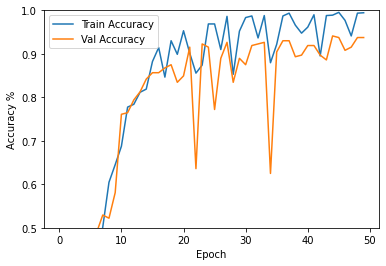

In [ ]:
# plot the accuracy history
import matplotlib.pyplot as plt
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy %')
    plt.plot(history.epoch, np.array(history.history['acc']),
    label='Train Accuracy')
    plt.plot(history.epoch, np.array(history.history['val_acc']),
    label = 'Val Accuracy')
    plt.legend()
    plt.ylim([0.5, 1])
plot_history(history)

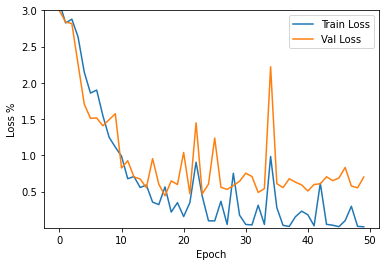

In [ ]:
def plot_history_loss(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss %')
    plt.plot(history.epoch, np.array(history.history['loss']),
    label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_loss']),
    label = 'Val Loss')
    plt.legend()
    plt.ylim([0.001, 3])
plot_history_loss(history)

In [ ]:
def predict_val(X_test,model):
  pred_data=np.reshape(X_test,(1,224,224,3))
  pred_data=pred_data/255
  pred=model.predict(pred_data)
  class_num = np.argmax(pred)
  return class_num, np.max(pred)


In [ ]:
def return_name(label_arr):
  idx = np.where(label_arr == 1)
  return idx

In [ ]:
model.save('/content/drive/MyDrive/PGPAIML/Computer Vision/Week 3 project/transfer_model.h5')
model.save_weights('/content/drive/MyDrive/PGPAIML/Computer Vision/Week 3 project/transfer_model_weight.h5')

In [ ]:
test_image = cv2.imread('/content/drive/MyDrive/PGPAIML/Computer Vision/Week 3 project/Prediction - Flower.jpg')
# Resize the image to 64X64 shape to be compatible with the model
test_image = cv2.resize(test_image,(128,128))

# Check if the size of the Image array is compatible with Keras model
print(test_image.shape)

# If not compatible expand the dimensions to match with the Keras Input
test_image = np.expand_dims(test_image, axis = 0)
test_image =test_image*1/255.0

#Check the size of the Image array again
print('After expand_dims: '+ str(test_image.shape))


#Predict the result of the test image
result = classifier.predict(test_image)

Model trained in CNN from scratch


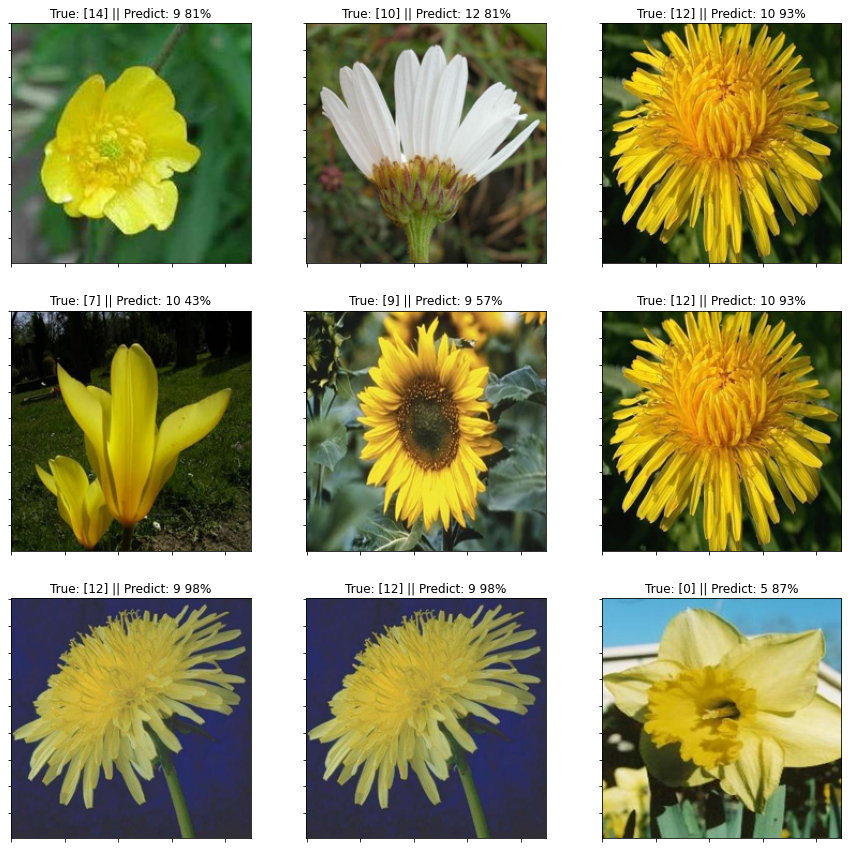

In [ ]:
print("Model trained in CNN from scratch")
plt.figure(figsize=(15,15))
for i in range(9):
  
  idx = np.random.randint(50)
  
  ax = plt.subplot(3,3,i+1)
  plt.imshow(X_test[idx]/255)
  category_idx = return_name(X_test[idx])
  
  pred, prob = predict_val(X_test[idx], cnn_model)
  plt.title('True: %s || Predict: %s %d%%' % (y_test[idx], pred, round(prob, 2)*100))
  plt.grid(False)
  ax.set_yticklabels([])
  ax.set_xticklabels([])
  
plt.show()

In [ ]:
print("Model trained from VGG")
plt.figure(figsize=(15,15))
for i in range(9):
  
  idx = np.random.randint(50)
  
  ax = plt.subplot(3,3,i+1)
  plt.imshow(X_test[idx]/255)
  category_idx = return_name(X_test[idx])
  
  pred, prob = predict_val(X_test[idx], model)
  plt.title('True: %s || Predict: %s %d%%' % (y_test[idx], pred, round(prob, 2)*100))
  plt.grid(False)
  ax.set_yticklabels([])
  ax.set_xticklabels([])
  
plt.show()

Model trained from VGG


In [ ]:
import matplotlib.pyplot as plt
import cv2

In [ ]:
car_dir="/content/drive/MyDrive/PGPAIML/Computer Vision/Week 3 project/car_images/Cars Images-20210220T015320Z-001.zip"

In [ ]:
image=plt.imread("/content/drive/MyDrive/PGPAIML/Computer Vision/Week 3 project/car_images/Cars Images/00001.jpg")
plt.imshow(image)

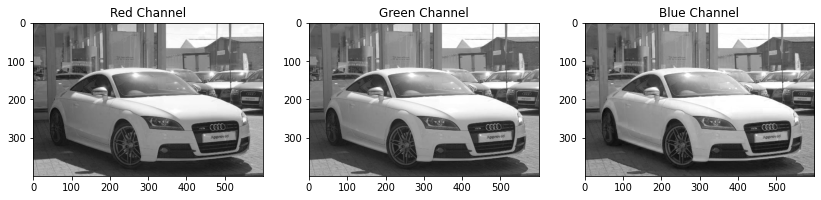

In [ ]:
plt.figure(figsize=(14,10))
plt.subplot(1,3,1)
plt.title("Red Channel")
plt.imshow(image[:,:,0],cmap='gray')

plt.subplot(1,3,2)
plt.title("Green Channel")
plt.imshow(image[:,:,1],cmap='gray')

plt.subplot(1,3,3)
plt.title("Blue Channel")
plt.imshow(image[:,:,2],cmap='gray')

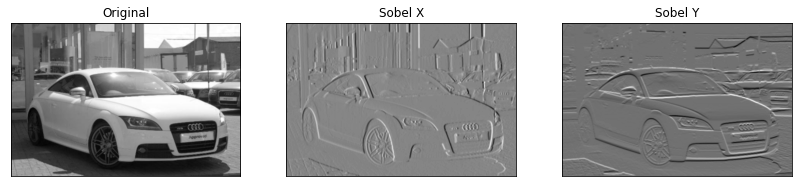

In [ ]:
# converting to gray scale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# remove noise
img = cv2.GaussianBlur(gray,(3,3),0)

sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y

plt.figure(figsize=(14,10))
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

In [ ]:
from scipy import ndimage

#rotation angle in degree
plt.figure(figsize=(14,10))
plt.subplot(1,3,1),plt.imshow(ndimage.rotate(image, 45))
plt.title('rotate_45 degree'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(ndimage.rotate(image, 90))
plt.title('rotate_90 degree'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(ndimage.rotate(image, 180))
plt.title('rotate_180 degree'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'rotate_180 degree'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))